# Исследование объявлений о продаже квартир

### Определим какие факторы влияют на рыночную стоимость недвижимости
_____________________________________________________________________________________

###### Исследование разделим на несколько частей.
##### Часть 1. Изучение общей информации:
* [1. Изучим файлы с данными, получим общую информацию, загрузим библиотеки.](#1-bullet)

##### Часть 2. Подготовка данных:
* [1. Обработка пропусков.](#2-bullet)
* [2. Замена типа данных.](#3-bullet)

##### Часть 3. Добавим показатели в данные:
* [1. Рассчитаем цену квадратного метра.](#4-bullet)
* [2. Добавим день недели, месяц и год публикации объявления.](#5-bullet)
* [3. Определим этаж квартиры как "первый", "последний или "другой".](#6-bullet)
* [4. Рассчитаем соотношение жилой и общей площади, а также отношение площади кухни к общей.](#7-bullet)
* [5. Рассчитаем удаленность в км от центра.](#8-bullet)

##### Часть 4. Исследовательский анализ данных:
* [1. Построим гистограммы для показателей площади, цены, числа комнат и высоты потолков.](#9-bullet)
* [2. Оценим скорость продажи квартир.](#10-bullet)
* [3. Избавимся от выбросов в данных.](#11-bullet)
* [4. Изучим какие факторы больше всего влияют на стоимость квартиры.](#12-bullet)
* [5. Рассмотрим населенные пункты с самой высокой и низкой стоимостью жилья.](#13-bullet)
* [6. Определим, где проходит граница "центра" для Санкт-Петербурга.](#14-bullet)
* [7. Проанализируем квартиры в центре. Разберемся какие факторы влияют на цену.](#15-bullet)

##### Часть 5. Заключение:
* [Общий вывод.](#16-bullet)

___________________________________________________
###### Справка об исходных данных:
* 1. Источник данных - архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет из сервиса Яндекс.Недвижимость.
* 2. По каждой квартире на продажу доступны два вида данных: вписанные пользователем и полученные автоматически на основе картографических данных.
____________________________________________________

<a id='1-bullet'></a>
### Часть 1. Изучим файл с данными, получим общую информацию, загрузим библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep="\t")
print('Общая информация о данных:')
print(data.info())

Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-n

In [2]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<div class="alert alert-block alert-warning">
Значительное количество пропусков в данных. Необходимо разбираться почему они оказались в нашем датасете. Судя по названиям столбцов тип данных в целом указан верно, но есть столбцы, тип данных в которых стоит изменить на int.
</div>

### Часть 2. Подготовка данных

<a id='2-bullet'></a>
#### 1. Обработка пропусков

In [3]:
print(data.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [4]:
#разберемся с пропусками в 'balcony'

try:
    #пропуски в 'balcony' - количественные, заменим их характерными занчениями
    #продположим, что если число балконов не указано, то нет ни одного балкона
    data.loc[data['balcony'].isnull(), 'balcony'] = 0
    print('Пропуски в "balcony" успешно заменены на 0')
except:
    print('Пропуски в "balcony" не удалось заменить на 0, проверь данные')

Пропуски в "balcony" успешно заменены на 0


In [5]:
#разберемся с пропусками в 'is_apartment'

try:
    #предположим, что если не указано, что квартира = апартаменты, то это не так
    #заменим все пропуски на false
    data.loc[data['is_apartment'].isnull(), 'is_apartment'] = False
    if data['is_apartment'].isnull().sum() == 0:
        print('Пропуски в "is_apartment" успешно заменены на False')
    else:
        print('Пропуски в "is_apartment" не удалось заменить, проверь данные')
except:
    print('Пропуски в "is_apartment" не удалось заменить, проверь данные')

Пропуски в "is_apartment" успешно заменены на False


In [7]:
#разберемся с пропусками в 'locality_name'

try:
    #данные категориальные, но с чем их сверить не ясно, поэтому оставим пропуски в виде пробелов
    #и обсудим это с людьми, ответственными за выгрузку данных или разработчиками Я.Недвижимость
    data.loc[data['locality_name'].isnull(), 'locality_name'] = 'no_name'
    if data['locality_name'].isnull().sum() == 0:
        print('Пропуски в "locality_name" успешно заменены на no_name')
    else:
        print('Пропуски в "locality_name" не удалось заменить, проверь данные')
except:
    print('Пропуски в "locality_name" не удалось заменить, проверь данные')

Пропуски в "locality_name" успешно заменены на no_name


In [8]:
#в значениях высоты потолков есть аномальное скопление в диапазоне 6-20м
#предположив, что при занесении была допущена ошибка на 0, разделили эти значенния на 10

try:
    data_ceil = data.query('ceiling_height > 6')
    for height in data_ceil['ceiling_height'].unique():
        data.loc[data['ceiling_height'] == height, 'ceiling_height'] = height / 10
    data.loc[data['ceiling_height'].isnull(), 'ceiling_height'] = data['ceiling_height'].median()
#    data.plot(kind='scatter', x='last_price', y='ceiling_height')
    print('Пропуски успешно зменены на медиану, а значения более 6 м, разделены на 10')
except:
    print('Не удалось внести изменения в значения ceiling_height')

Пропуски успешно зменены на медиану, а значения более 6 м, разделены на 10


In [9]:
#в студиях кухня отсутстувует, поэтому в столбце kitchen_area
#поставим 0 если это студия и медиану в остальных случаях

try:
    data.loc[(data['kitchen_area'].isnull()) & (data['studio'] == True), 'kitchen_area'] = 0
    data.loc[(data['kitchen_area'].isnull()) &
             (data['studio'] == False), 'kitchen_area'] = data['kitchen_area'].median()
    print('Пропуски в kitchen_area успешно заполнены')
except:
    print('Пропуски в kitchen_area не удалось заполнить')

Пропуски в kitchen_area успешно заполнены


In [10]:
#жилая площадь зависит от количества комнат, поэтому заполним пропущенные занчения
#в living_area характерными медианными занчениями 

try:
    for rooms in data['rooms'].unique():
        median = data.loc[data['rooms'] == rooms, 'living_area'].median()
        data.loc[(data['living_area'].isnull()) & (data['rooms'] == rooms), 'living_area'] = median
    print('Пропуски в living_area успешно заменены')
except:
    print('Пропуски в living_area заменить не удалось')

Пропуски в living_area успешно заменены


In [11]:
#пропуски в столбцах 'ponds_around3000', 'parks_around3000' скорее всего означают,
#что в радиусе 3км ни парков, ни водоемов нет, поэтому заполним пропуски нулями

try:
    column_to_zero = ['ponds_around3000', 'parks_around3000']
    for column in column_to_zero:
        data.loc[data[column].isnull(), column] = 0
        print('Пропуски в', column, 'успешно заполнены нулями')
except:
    print('Пропуски в ponds_around3000 и в parks_around3000 не удалось заменить, проверь данные')

Пропуски в ponds_around3000 успешно заполнены нулями
Пропуски в parks_around3000 успешно заполнены нулями


In [12]:
#видно, что растет количество пропусков в days_exposition растет по мере приближения к текущему моменту
#можно сделать вывод, что эти объявления еще в экспозиции заполним характерными медианными значениями
#в зависимости от года и месяца размещения

try:
    #добавим столбец формата "YYYY-MM" для более сбалансированной замены
    data['year_mounth'] = pd.to_datetime(data['first_day_exposition']).dt.to_period('M')
    for period in data['year_mounth'].unique():
        median = data.loc[data['year_mounth'] == period, 'days_exposition'].median()
        data.loc[(data['days_exposition'].isnull()) & (data['year_mounth'] == period), 'days_exposition'] = median
    print('Пропуски в days_exposition успешно заменены')
except:
    print('Пропуски в days_exposition заменить не удалось')

Пропуски в days_exposition успешно заменены


<div class="alert alert-info" role="alert">
Предположительно пропуски получили из-за того, что свежие объявления ещё в экспозиции. Строго говоря, это не может являться пропуском, но для анализа хотелось бы заполнить медианой в зависимости от даты месяца и года размещения.
</div>

In [13]:
print()
print('Все выбранные для заполнения пропуски в данных заполнены')
print(data.isnull().sum())


Все выбранные для заполнения пропуски в данных заполнены
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition             0
year_mounth                 0
dtype: int64


<a id='3-bullet'></a>
#### 2. Замена типа данных

In [14]:
#изменим дробные значения на целые в некоторых колонках, чтобы не отвлекали от сути 
#занчения в колонках floors_total, parks_nearest и ponds_nearest содержат пропуски,
#поэтому у этих колонок менять тип не станем

column_to_int = ['balcony', 'parks_around3000', 'ponds_around3000', 
                 'days_exposition', 'last_price', 'floor', 'rooms', 'total_images']
try:
    for column in column_to_int:
        data[column] = data[column].astype('int')
    print('Тип в данных успешно изменен на int')
except:
    print('Не удалось изменить тип данных на int')

Тип в данных успешно изменен на int


<div class="alert alert-block alert-warning">
Странно, что могу появиться пропуски в наименовании населенного пункта, это важно и точно стоит обсудить с инжинерами по выгрузке данных и с разработчиками Я.Недвижимости. 
    
'airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest' - не заполняем
    
Остальные пропуски ожидаемы потому что не обязательны для заполнения. Можно проработать какие из них могут заполняться до выгрузки автоматически на основании уже заполненных данных.
</div>

### Шаг 3. Добавим показатели в данные

<a id='4-bullet'></a>
#### 1. Рассчитаем цену квадратного метра

In [15]:
#добавим в таблицу цену квадратного метра
try:
    data['price_per_metr'] = data['last_price'] / data['total_area']
    #внушительная дробная часть отвлекает внимание от анализа, уберем её
    data['price_per_metr'] = data['price_per_metr'].astype('int')
    print('Цена за квадратный метр добавлена в таблицу')
except:
    print('Не удалось добавить цену квадратного метра')    

Цена за квадратный метр добавлена в таблицу


<a id='5-bullet'></a>

<a id='5-bullet'></a>
#### 2. Добавим день недели, месяц и год публикации объявления

In [16]:
#добавим в отдельные колонки день недели, месяц и год публикации объявления
try:
    data['day_of_week'] = pd.to_datetime(data['first_day_exposition']).dt.dayofweek
    data['mounth'] = pd.to_datetime(data['first_day_exposition']).dt.strftime('%m')
    data['year'] = data['first_day_exposition'].str[:4]
except:
    print('Не удалось добавить столбцы с датами')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_mounth,price_per_metr,day_of_week,mounth,year
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,1,482.0,2,755.0,19,2019-03,120370,3,03,2019
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,...,0,NaN,0,NaN,81,2018-12,82920,1,12,2018
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,1,90.0,2,574.0,558,2015-08,92785,3,08,2015
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.65,14.0,45.0,9,False,...,2,84.0,3,234.0,424,2015-07,408176,4,07,2015
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,2,112.0,1,48.0,121,2018-06,100000,1,06,2018


<a id='6-bullet'></a>

<a id='6-bullet'></a>
#### 3. Определим этаж квартиры как "первый", "последний или "другой"

In [17]:
#добавим тип этажа квартиры исходя из вариантов "первый", "последний", "другой"
def type_of_floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

try:
    data['type_of_floor'] = data.apply(type_of_floor, axis=1)
    print('Тип этажа квартиры добавлен')
except:
    print('Не удалось добавить тип этажа квартиры')

Тип этажа квартиры добавлен


<a id='7-bullet'></a>

<a id='7-bullet'></a>
#### 4. Рассчитаем соотношение жилой и общей площади, а также отношение площади кухни к общей

In [18]:
#добавим соотношение жилой и общей площади
try:
    data['part_of_living_area'] = data['living_area'] / data['total_area']
    print('Соотношение жилой площади к общей добавлено в таблицу')
except:
    print('Не удалось добавить отношение жилой площади к общей')
    
#добавим соотношение площади кухни к общей площади
try:
    data['part_of_kitchen_area'] = data['kitchen_area'] / data['total_area']
    print('Соотношение площади кухни к общей площади добавлено в таблицу')
except:
    print('Не удалось добавить соотношение площади кухни к общей площади')

Соотношение жилой площади к общей добавлено в таблицу
Соотношение площади кухни к общей площади добавлено в таблицу


<a id='8-bullet'></a>
#### 5. Рассчитаем удаленность в км от центра

In [19]:
#приведем расстояние до центра в км
try:
    data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
    #не смог иначе изменить тип данных с float на int при наличии пропущенных значений
    data.loc[data['cityCenters_nearest_km'].isnull(), 'cityCenters_nearest_km'] = 500000
    data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')
    data.loc[data['cityCenters_nearest_km'] == 500000, 'cityCenters_nearest_km'] = np.nan
    print('Удаленность от центра успешно приведена к "км"')
except:
    print('Не удалось привести удаленность от центра к "км"')

Удаленность от центра успешно приведена к "км"


<div class="alert alert-block alert-warning">
Успешно рассчитали и добавили данные в таблицу
</div>

### Шаг 4. Исследовательский анализ данных

<a id='9-bullet'></a>
#### 1. Построим гистограммы для показателей площади, цены, числа комнат и высоты потолков

Столбец: total_area


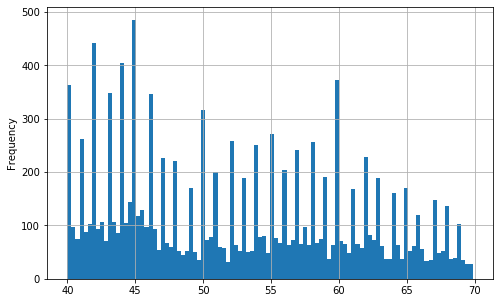

Столбец: last_price


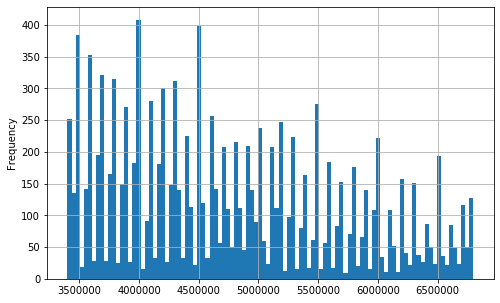

Столбец: rooms


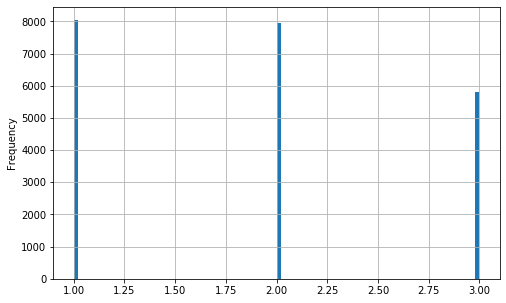

Столбец: ceiling_height


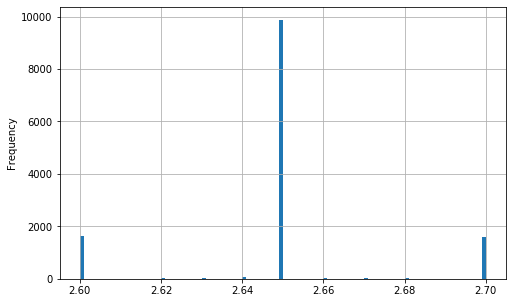

In [20]:
#создадим графики для интересующих нас данных
#сразу отфильтруем хвосты, ниже посмотрим детальнее с помощью боксплота
try:
    columns_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
    for columns in columns_list:
        q1 = data[columns].quantile(0.25)
        q3 = data[columns].quantile(0.75)
        igr = q3 - q1
        print('Столбец:', columns)
        data[columns].plot(kind='hist', bins=100, range=(q1, q3), grid=True, figsize=(8, 5))
        plt.show()
except:
    print('')

<div class="alert alert-block alert-warning">   
Странный пик в "total_area" около 60 и 45 кв метров, это не типично. Думаю, в колонке "ceiling_height" средний пик сделали мы, когда установили в пустых медиану - график выглядит нормально. График "last_price" очень похож на "total_area", видимо между этими показателями сильная корреляция.
</div>

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


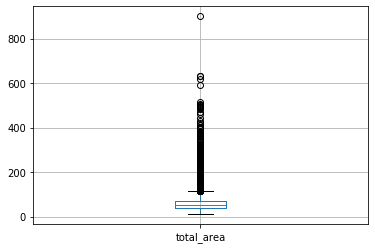

In [21]:
column = columns_list[0]
print(data[column].describe())
data.boxplot(column)
plt.show()

<div class="alert alert-block alert-warning">   
Медиана столбца "общая площадь" 52 кв м, среднее при этом 60 кв м. По графику видно, что есть объекты со значительной площадью, которые влияют на среднее, но не на медиану. Особо отличившиеся вбросы около 600 кв м и больше 800. Возможно при занесении данных ошиблись и указали дополнительный 0, а возможно это реальные данные. Для анализа отфильтруем их.
</div>

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


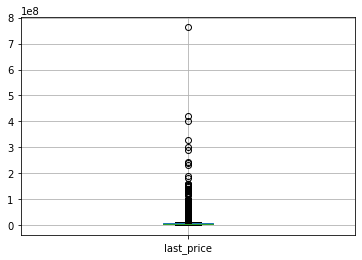

In [22]:
column = columns_list[1]
print(data[column].describe())
data.boxplot(column)
plt.show()

<div class="alert alert-block alert-warning">   
Цена продажи имеет медиану на уровне 4,65 млн руб. При этом срерднее 6,54 млн руб. Присутствует множество выбросов, которые стоит отфильтровать.
</div>

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


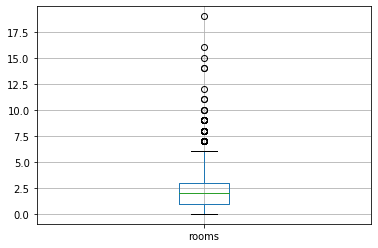

In [23]:
column = columns_list[2]
print(data[column].describe())
data.boxplot(column)
plt.show()

<div class="alert alert-block alert-warning">   
Медиана количества комнат равна 2, среднее также около двух, присутствуют выбросы.
</div>

count    23699.000000
mean         2.696571
std          0.228457
min          0.800000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64


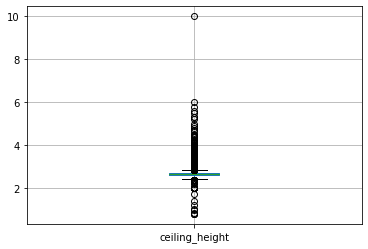

In [24]:
column = columns_list[3]
print(data[column].describe())
data.boxplot(column)
plt.show()

<div class="alert alert-block alert-warning">   
Медиана высоты потолков на уровне 2,65м, среднее 2,7м. Есть выброс около 10м.
</div>

<a id='10-bullet'></a>
#### 2. Оценим скорость продажи квартир

count    23699.000000
mean       165.312714
std        213.048750
min          1.000000
25%         39.000000
50%         81.000000
75%        203.500000
max       1580.000000
Name: days_exposition, dtype: float64
9.0 616.0


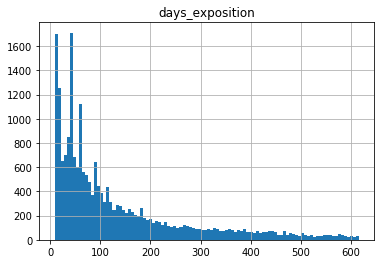

In [25]:
#изучим скорость продажи квартиры
print(data['days_exposition'].describe())
q1 = data['days_exposition'].quantile(0.05)
q3 = data['days_exposition'].quantile(0.95)
data.hist(column='days_exposition', bins=100, range=(q1, q3))
print(q1, q3)

<div class="alert alert-block alert-warning">   
Два пика появились из-за замены пустных значений на медиану в зависимости от месяца и года начала экспозиции. В целом график скошенный.
</div>

<a id='11-bullet'></a>
#### Избавимся от выбросов в данные

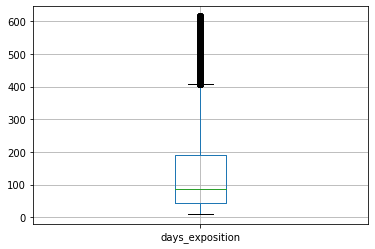

In [26]:
#отберем условно "быстрые" и "медленные" продажи и отфильтруем их
data_filtred = data[
    (data['days_exposition'] < 616) & 
    (data['days_exposition'] > 9)]
data_filtred.boxplot('days_exposition')

<div class="alert alert-block alert-warning">   
График определенно стал выглядель лучше после фильтрации, однако есть в данных всё ещё значения, сильно превышающие средние значения. Оставим их как есть.
</div>

In [27]:
#оценим какое у нас соотношение "медленных" и "быстрых" продаж
too_slow = len(data.query('days_exposition > @q3')) / len(data)
too_fast = len(data.query('days_exposition < 5')) / len(data)
print('Доля медленных продаж: {:.0%}'.format(too_slow))
print('Доля быстрых продаж: {:.1%}'.format(too_fast))

Доля медленных продаж: 5%
Доля быстрых продаж: 1.7%


<div class="alert alert-block alert-warning">   
Отфильтровав все продажи, дольше 616 дней и менее 5 получили условно нормальное время продажи квартиры. Медианное время продажи 81 дней, среднее отличается значительно и составляет 165 дней.
</div>

Доля офильтрованных данных:5%


count    1.950300e+04
mean     5.113652e+06
std      2.670807e+06
min      4.300000e+05
25%      3.350000e+06
50%      4.500000e+06
75%      6.250000e+06
max      1.500000e+07
Name: last_price, dtype: float64

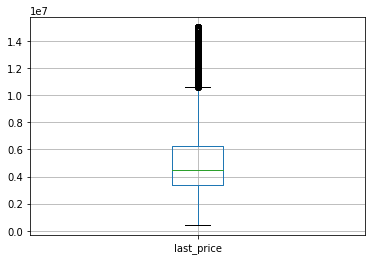

In [28]:
data_filtred = data_filtred[data_filtred['last_price'] < 15000000]
part_of_filter = len(data.query('last_price > 15000000')) / len(data)
print('Доля офильтрованных данных:{:.0%}'.format(part_of_filter))
data_filtred.boxplot('last_price')
data_filtred['last_price'].describe()

<div class="alert alert-block alert-warning">   
Отфильтровали все цены, дороже 15 млн руб. Такая цифра выбрана как компромисс между потерей данных и их разбросом.
</div>

Доля офильтрованных данных:0.38%


count    19466.000000
mean         1.965581
std          0.927224
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

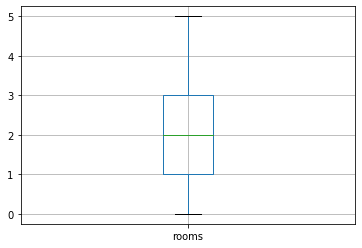

In [29]:
data_filtred = data_filtred[data_filtred['rooms'] < 6]
part_of_filter = len(data.query('rooms > 6')) / len(data)
print('Доля офильтрованных данных:{:.2%}'.format(part_of_filter))
data_filtred.boxplot('rooms')
data_filtred['rooms'].describe()

<div class="alert alert-block alert-warning">   
Отфильтровали все сделки с квартирами, в которых больше 6 комнат, это всего лишь 0,38% в данных.
</div>

Доля офильтрованных данных:5.80%


count    19063.000000
mean        53.315863
std         18.216741
min         12.000000
25%         39.000000
50%         50.000000
75%         64.000000
max        109.700000
Name: total_area, dtype: float64

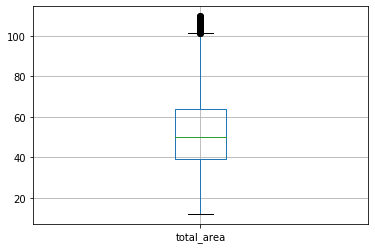

In [30]:
data_filtred = data_filtred[data_filtred['total_area'] < 110]
part_of_filter = len(data.query('total_area > 110')) / len(data)
print('Доля офильтрованных данных:{:.2%}'.format(part_of_filter))
data_filtred.boxplot('total_area')
data_filtred['total_area'].describe()

<div class="alert alert-block alert-warning">   
Отфильтровали все квартиры с площадью более 110 кв. метров, это 5,8% данных.
</div>

Доля офильтрованных данных:1.16%


count    18882.000000
mean         2.663320
std          0.152474
min          0.800000
25%          2.600000
50%          2.650000
75%          2.670000
max          3.490000
Name: ceiling_height, dtype: float64

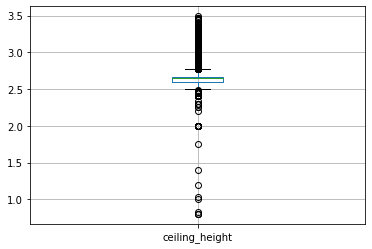

In [31]:
data_filtred = data_filtred[data_filtred['ceiling_height'] < 3.5]
part_of_filter = len(data.query('ceiling_height > 3.5')) / len(data)
print('Доля офильтрованных данных:{:.2%}'.format(part_of_filter))
data_filtred.boxplot('ceiling_height')
data_filtred['ceiling_height'].describe()

<div class="alert alert-block alert-warning">   
Отфильтровали все сделки с квартирами, потолки в которых ниже 3.5 метров, это 1,16% в данных.
</div>

In [32]:
part_of_filter = 1 - (len(data_filtred) / len(data))
print('Доля офильтрованных данных:{:.0%}'.format(part_of_filter))

Доля офильтрованных данных:20%


<a id='12-bullet'></a>
### 4. Изучим какие факторы больше всего влияют на стоимость квартиры

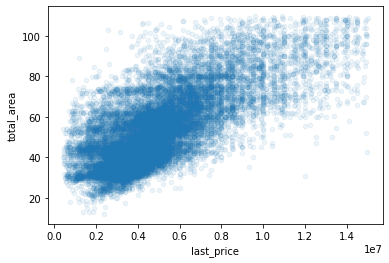

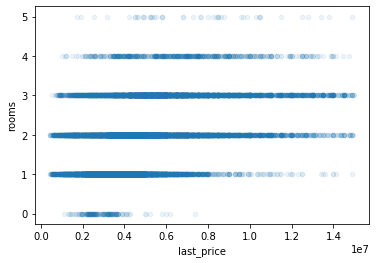

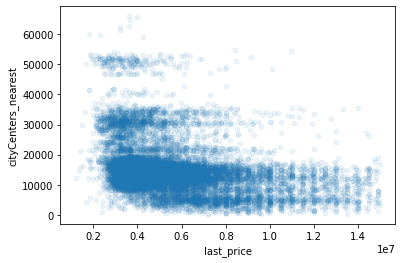

In [33]:
#изучим какие факторы больше всего влияют на стоимость квартиры.
#узнаем зависит ли цена от площади, числа комнат, удалённости от центра.
try:
    column_list = ['total_area', 'rooms', 'cityCenters_nearest']
    for column in column_list:
        data_filtred.plot(x='last_price', y=column, kind='scatter', alpha=0.08) 
        plt.show
except:
    print('')

In [34]:
try:
    column_list = ['total_area', 'rooms', 'cityCenters_nearest']
    for column in column_list:
        corr_column = data[column].corr(data['last_price'])
        print('Коэффициент корреляции между "last_price" и {} до фильтрации: {:.2}'
              .format(column, corr_column))
except:
    print('')

Коэффициент корреляции между "last_price" и total_area до фильтрации: 0.65
Коэффициент корреляции между "last_price" и rooms до фильтрации: 0.36
Коэффициент корреляции между "last_price" и cityCenters_nearest до фильтрации: -0.21


In [35]:
try:
    column_list = ['total_area', 'rooms', 'cityCenters_nearest']
    for column in column_list:
        corr_column = data_filtred[column].corr(data_filtred['last_price'])
        print('Коэффициент корреляции между "last_price" и {} после фильтрации: {:.2}'
              .format(column, corr_column))
except:
    print('')

Коэффициент корреляции между "last_price" и total_area после фильтрации: 0.72
Коэффициент корреляции между "last_price" и rooms после фильтрации: 0.43
Коэффициент корреляции между "last_price" и cityCenters_nearest после фильтрации: -0.34


In [36]:
part_of_filter = 1 - (len(data_filtred) / len(data))
print('Доля офильтрованных данных:{:.0%}'.format(part_of_filter))

Доля офильтрованных данных:20%


<div class="alert alert-block alert-warning">   
Присутствует корреляция с ценой продажи у всех выбранных факторов (общая площадь, количество комнат, близость к центру). Наибольшую корреляцию можно увидеть у значений цены и общей площади, что ожидаемо. Следующим фактором по убыванию будет количество комнат, что также не удивляет. На последнем месте из рассматриваемых факторов оказалась близость к центру города. Однако, по графику цены и расстояния до центра есть зона около 10 км, где зависимость выражена больше, чем во всем остальном поле, проверим эту гипотезу.
</div>

(0, 5400000)

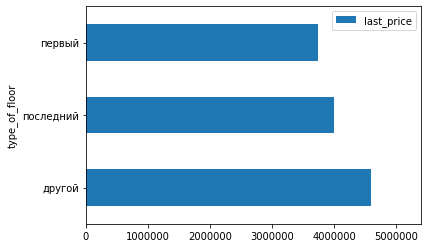

In [37]:
#изучим зависимость цены от того, на каком этаже расположена квартира: первом или последнем
pivot_sc = (data_filtred
           .pivot_table(index='type_of_floor', values=['last_price'], aggfunc='median')
           .sort_values(by='last_price', ascending=False)
           .plot(kind='barh').set_xlim(0, 5400000)
           )
pivot_sc

<div class="alert alert-block alert-warning">   
Самый популярный тип этажа "другой", "последний" на втором месте и наименее популярным оказался "первый" этаж. Медиана для квартир первого этажа 3,9 млн руб, для последнего 4,5 млн руб. Таким образом, хоть и не намного, но последний этаж ценится больше, чем первый.
</div>

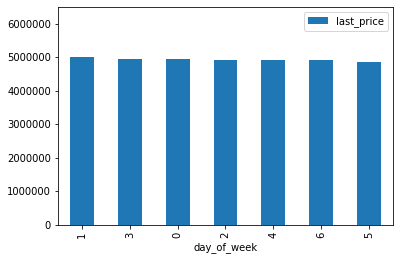

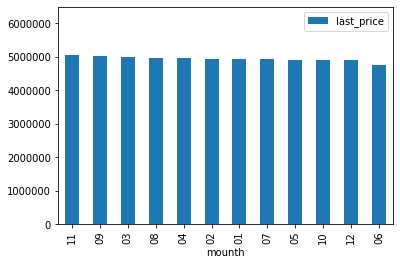

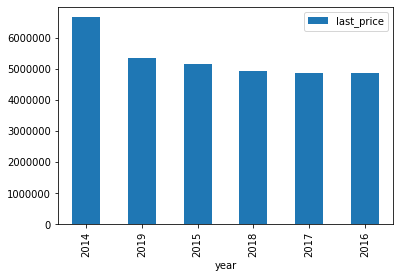

In [38]:
#изучим зависимость от даты размещения: дня недели, месяца и года.
column_list_date = ['day_of_week', 'mounth']
for column in column_list_date: 
    data_group = (data_filtred
                  .pivot_table(index=column, values='last_price', aggfunc='mean')
                  .sort_values(by='last_price', ascending=False)
                  .plot(kind='bar').set_ylim(0, 6500000)
                  )
    
data_group_year = (data_filtred
                   .pivot_table(index='year', values='last_price', aggfunc='mean')
                   .sort_values(by='last_price', ascending=False)
                   .plot(kind='bar')
                   )

<div class="alert alert-block alert-warning">   
Зависимость цены от дня и месяца размещения практически отсутствует. В то же время размещение в зависимости от года имеет корреляцию с ценой. Хочется сказать. что 2014 год был самым удачным с точки зрения цен на недвижимость, но в 2014 было значительно меньше объявлений.
</div>

<a id='13-bullet'></a>
### 5. Рассмотрим населеные пункты с самой высокой и низкой стоимостью жилья

Населенные пункты с наибольшим числом объявлений и средняя стоимость квадратного метра


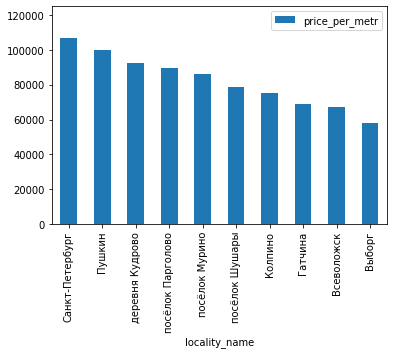

In [39]:
#выделим 10 населённых пунктов с наибольшим числом объявлений
top_locality_count = data_filtred['locality_name'].value_counts().head(10)
top_locality = top_locality_count.index
data_top_locality = data_filtred.query('locality_name in @top_locality')

#Посчитайте среднюю цену квадратного метра в этих населённых пунктах
locality_price_per_metr = (data_top_locality.groupby('locality_name').agg({'price_per_metr': 'mean'})
                           .sort_values(by='price_per_metr', ascending=False)
                           .plot(kind='bar').set_ylim(0, 125000)
                          )
print('Населенные пункты с наибольшим числом объявлений и средняя стоимость квадратного метра')

Населенные пункты с самой низкой стоимостью жилья из локаций с наибольшим числом объявлений


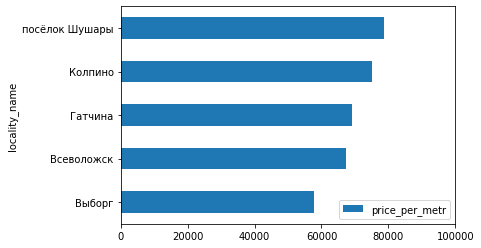

In [40]:
#Выделите населённые пункты с самой высокой и низкой стоимостью жилья
locality_price_per_metr_low = (data_top_locality.groupby('locality_name').agg({'price_per_metr': 'mean'})
                           .sort_values(by='price_per_metr', ascending=True).head(5)
                           .plot(kind='barh').set_xlim(0, 100000)
                          )
print('Населенные пункты с самой низкой стоимостью жилья из локаций с наибольшим числом объявлений')

Населенные пункты с самой высокой стоимостью жилья


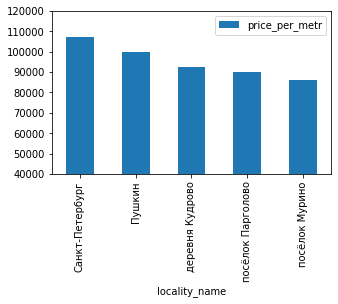

In [41]:
#Выделите населённые пункты с самой высокой и низкой стоимостью жилья
locality_price_per_metr_high = (data_top_locality.groupby('locality_name').agg({'price_per_metr': 'mean'})
                                .sort_values(by='price_per_metr', ascending=False).head()
                                .plot(kind='bar', figsize=(5, 3)).set_ylim(40000, 120000)
                          )
print('Населенные пункты с самой высокой стоимостью жилья')

<a id='14-bullet'></a>
### 6. Определим где проходит граница "центра" для Санкт-Петербурга

In [42]:
#изучим редложения квартир: для каждой квартиры есть информация о расстоянии до центра
#выделим квартиры в Санкт-Петербурге.
data_spb = data_filtred.query('locality_name == "Санкт-Петербург"')

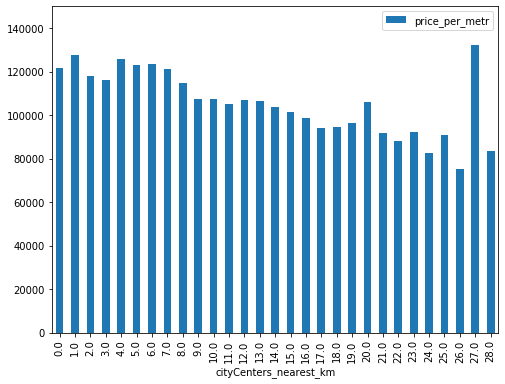

In [43]:
data_spb_pivot = (data_spb
                  .pivot_table(index='cityCenters_nearest_km', values='price_per_metr', aggfunc='mean')
                  .sort_values(by='cityCenters_nearest_km', ascending=True)
                  .plot(kind='bar', figsize=(8, 6)).set_ylim(0, 150000)
                 )

<div class="alert alert-block alert-warning">   
График средней цены за квадратный метр сильно изменяется после отметки 8 км. Можно предположить, что граница центра Санкт-Петербурга проходит на уровне 8 км.
</div>

<a id='15-bullet'></a>
### 7. Проанализируем квартиры в центре. Разберемся какие факторы влияют на цену

In [44]:
data_centr_spb = data_spb.query('cityCenters_nearest_km <=8')

count    2534.000000
mean       63.753962
std        20.737887
min        12.000000
25%        46.300000
50%        62.000000
75%        79.550000
max       109.700000
Name: total_area, dtype: float64


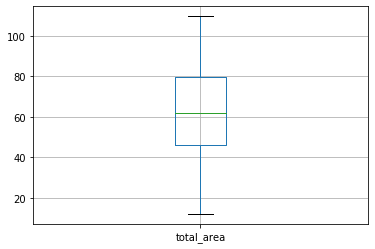

count    2534.000000
mean        2.230071
std         0.919343
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64


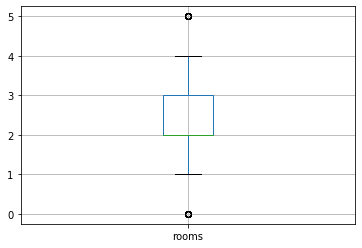

count    2534.000000
mean        2.805205
std         0.234874
min         2.000000
25%         2.650000
50%         2.650000
75%         3.000000
max         3.490000
Name: ceiling_height, dtype: float64


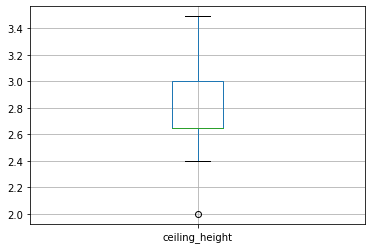

count    2.534000e+03
mean     7.548686e+06
std      2.727651e+06
min      1.686000e+06
25%      5.500000e+06
50%      7.150000e+06
75%      9.288367e+06
max      1.499000e+07
Name: last_price, dtype: float64


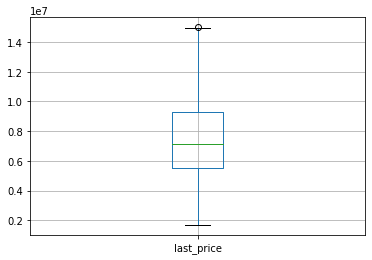

In [45]:
column_centr_spb = ['total_area', 'rooms', 'ceiling_height', 'last_price']
try:
    for column in column_centr_spb:
        print(data_centr_spb[column].describe())
        data_centr_spb.boxplot(column)
        plt.show()
except:
    print('')

<div class="alert alert-block alert-warning">   
По сравнению с остальными предложениями квартиры в центре по медиане:
    
1. Больше по общей площади (62 в центре против 50 кв м);
    
2. Дороже по последней цене (7,15 в центре против 4,5 млн руб);
    
3. Не отличаются по числу комнат (2 комнаты) и высоте потолков (2,65м).
    
</div>

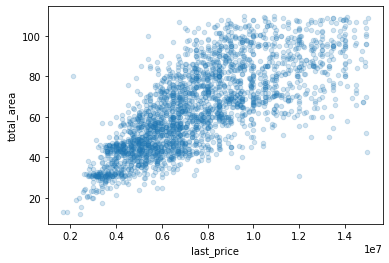

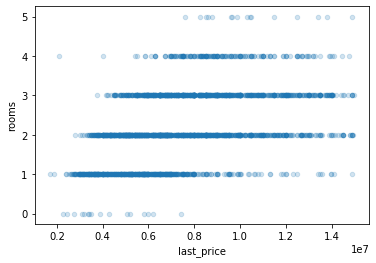

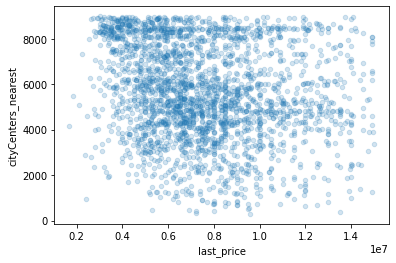

In [46]:
try:
    column_list = ['total_area', 'rooms', 'cityCenters_nearest']
    for column in column_list:
        data_centr_spb.plot(x='last_price', y=column, kind='scatter', alpha=0.2) 
        plt.show
except:
    print('')

In [47]:
try:
    column_list = ['total_area', 'rooms', 'cityCenters_nearest']
    for column in column_list:
        corr_column = data_centr_spb[column].corr(data_centr_spb['last_price'])
        print('Коэффициент корреляции между last_price и {}: {:.2}'
              .format(column, corr_column))
except:
    print('')

Коэффициент корреляции между last_price и total_area: 0.73
Коэффициент корреляции между last_price и rooms: 0.44
Коэффициент корреляции между last_price и cityCenters_nearest: -0.19


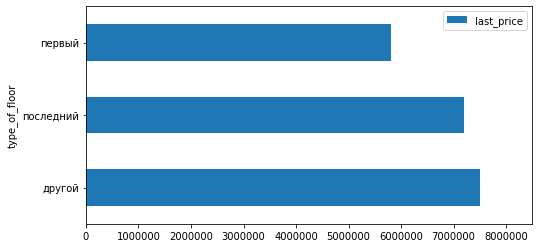

In [48]:
pivot_sc = (data_centr_spb
           .pivot_table(index='type_of_floor', values=['last_price'], aggfunc='median')
           .sort_values(by='last_price', ascending=False)
           .plot(kind='barh', figsize=(8, 4)).set_xlim(0, 8500000)
           )

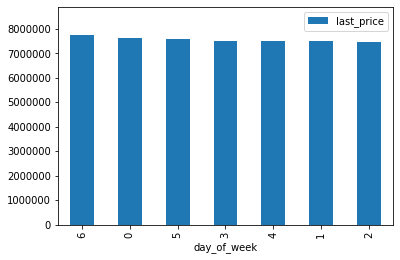

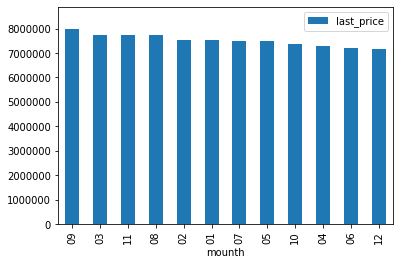

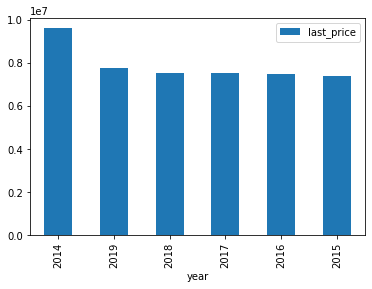

In [49]:
#изучим зависимость от даты размещения: дня недели, месяца и года.
column_list_date = ['day_of_week', 'mounth']
for column in column_list_date: 
    data_group = (data_centr_spb
                  .pivot_table(index=column, values='last_price', aggfunc='mean')
                  .sort_values(by='last_price', ascending=False)
                  .plot(kind='bar').set_ylim(0, 8900000)
                  )
    
data_group_year = (data_centr_spb
                   .pivot_table(index='year', values='last_price', aggfunc='mean')
                   .sort_values(by='last_price', ascending=False)
                   .plot(kind='bar')
                   )

<div class="alert alert-block alert-warning">   
  
    
    
1. Также как и по всем предложениям, по выбранным квартирам в центре СПб можем заметить корреляцию с ценой продажи у всех выбранных факторов (общая площадь, количество комнат, близость к центру). Эта корреляция сильнее выраженна в центре, но общий тренд не отличается. 
Наибольшую корреляцию можно увидеть у значений цены и общей площади (0,72 в центе против 0,73). Следующим фактором по убыванию будет количество комнат (0,43 в центре против 0,44). 
На последнем месте из рассматриваемых факторов оказалась близость к центру города (-0,34 в центре против -0,19).


2. Также как и по всем предложениям, по выбранным квартирам в центре СПб можем утверждать, что самый популярный тип этажа "другой", "последний" на втором месте и наименее популярным оказался "первый" этаж.
    

3. Зависимость цены от дня и месяца размещения практически отсутствует. В то же время размещение в зависимости от года имеет корреляцию с ценой. 2014 год был самым удачным с точки зрения цен на недвижимость. По этому показателю выводы по выборке центральных квартир СПб не отличаются от всех остальных предложений.
</div>

<a id='16-bullet'></a>
### Шаг 5. Общий вывод

<div class="alert alert-block alert-warning">


Типичная квартира, это 2х-комнатная квартира, расположенная в Санкт-Петербурге, общей площадью 50 кв. м., с потолками 2,65 м. и по цене 4,5 млн руб., которая продается за 81 день. Это описание очень похоже на «хрущевку».
    
    
    
Выводы, которые можно сделать по изученным данным:
1.	Самый популярный тип этажа "другой", "последний" на втором месте и наименее популярным оказался "первый" этаж. Медиана для квартир первого этажа 3,9 млн руб., для последнего 4,5 млн руб. Таким образом, хоть и ненамного, но последний этаж ценится больше, чем первый.
    
    
2.	Зависимость цены от дня и месяца размещения практически отсутствует. Самые дорогие предложения объектов были размещены в 2014 году, до 2017 года средняя цена снижалась, а после начался рост. Необходимо учитывать, что в 2014 году было существенно меньше объявлений.
    
    
3.	Можно предположить, что граница центра Санкт-Петербурга проходит на уровне 8 км, так как график средней цены за квадратный метр сильно изменяется именно в этом диапазоне. При этом после 4 км и далее, ближе к центру происходит снижение цены квадратного метра. Возможно, это связано с большим объемом коммунальных квартир в центре.
    
    
4.	По сравнению с остальными предложениями квартиры в центре СПб по медиане больше по общей площади (62 в центре против 50 кв. м), дороже (7,15 в центре против 4,5 млн руб.), но не отличаются по числу комнат (2 комнаты), высоте потолков (2,65м).
    
    
5.	Выводы, сделанные на основе данных центральной зоны Санкт-Петербурга, в целом не отличаются от общих. Что логично в центре уже не так сильно сказывается влияние близости к центру. Квартиры в центре в среднем больше и дороже. Наибольшую корреляцию можно увидеть у значений цены и общей площади (0,72 в центе против 0,73). Следующим фактором по убыванию будет количество комнат (0,43 в центре против 0,44). На последнем месте из рассматриваемых факторов оказалась близость к центру города (-0,34 в центре против -0,19). 
    
    
6.	Самые дешевые объекты расположены в Выборге, а самые дорогие в Санкт-Петербурге.
    
    
7.	Больше всего предложений из Санкт-Петербурга - 64%.

</div>